In [1]:
import sys
sys.path.insert(0, '..')

%load_ext tools.prov_magics
import tools.view.intertwined_prov
BASE = "../generated/intertwined_prov"

# Interwined-PROV

## Names, literals, and constants

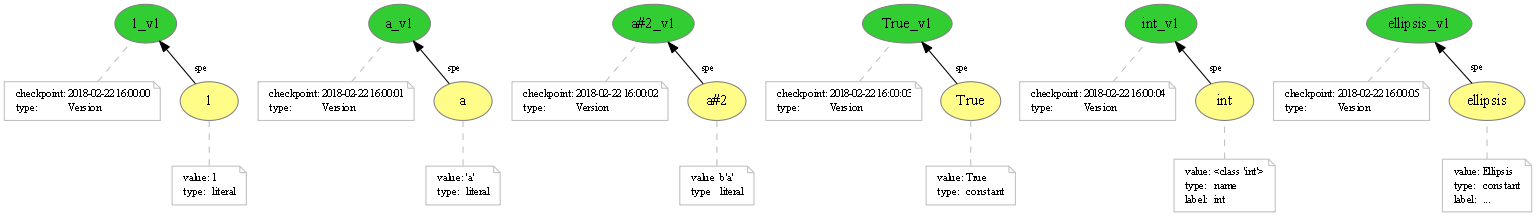

In [2]:
%%provn -o $BASE/names -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>
    
entity(1, [value="1", type="script:literal"])
entity(1_v1, [intertwined:checkpoint="2018-02-22T16:00:00", type="intertwined:Version"])
specializationOf(1, 1_v1)

entity(a, [value="'a'", type="script:literal"])
entity(a_v1, [intertwined:checkpoint="2018-02-22T16:00:01", type="intertwined:Version"])
specializationOf(a, a_v1)

entity(a#2, [value="b'a'", type="script:literal"])
entity(a#2_v1, [intertwined:checkpoint="2018-02-22T16:00:02", type="intertwined:Version"])
specializationOf(a#2, a#2_v1)

entity(True, [value="True", type="script:constant"])
entity(True_v1, [intertwined:checkpoint="2018-02-22T16:00:03", type="intertwined:Version"])
specializationOf(True, True_v1)

entity(int, [value="<class 'int'>", type="script:name", label="int"])
entity(int_v1, [intertwined:checkpoint="2018-02-22T16:00:04", type="intertwined:Version"])
specializationOf(int, int_v1)

entity(ellipsis, [value="Ellipsis", type="script:constant", label="..."])
entity(ellipsis_v1, [intertwined:checkpoint="2018-02-22T16:00:05", type="intertwined:Version"])
specializationOf(ellipsis, ellipsis_v1)

## Assignment

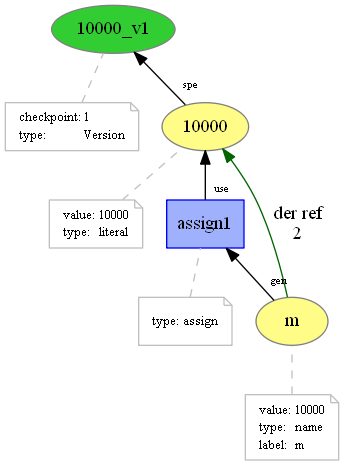

In [3]:
%%provn -o $BASE/assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

entity(10000, [value="10000", type="script:literal"])
entity(10000_v1, [intertwined:checkpoint="1", type="intertwined:Version"])
specializationOf(10000, 10000_v1)

entity(m, [value="10000", type="script:name", label="m"])

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="intertwined:Reference", intertwined:checkpoint="2"])

## Operation

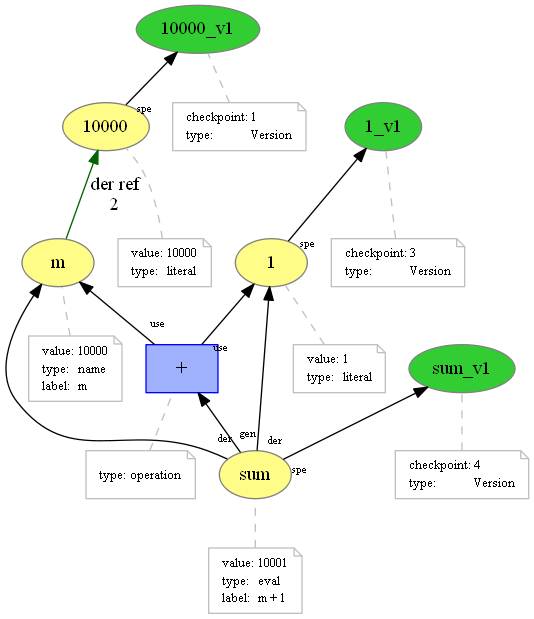

In [4]:
%%provn -o $BASE/operation -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

// old
entity(10000, [value="10000", type="script:literal"])
entity(10000_v1, [intertwined:checkpoint="1", type="intertwined:Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="script:name", label="m"])
wasDerivedFrom(m, 10000, -, g1, u1, [type="intertwined:Reference", intertwined:checkpoint="2"])

// new
entity(1, [value="1", type="script:literal"])
entity(1_v1, [intertwined:checkpoint="3", type="intertwined:Version"])
specializationOf(1, 1_v1)

entity(sum, [value="10001", type="script:eval", label="m + 1"])
entity(sum_v1, [intertwined:checkpoint="4", type="intertwined:Version"])
specializationOf(sum, sum_v1)

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g2, u3)

## List definition

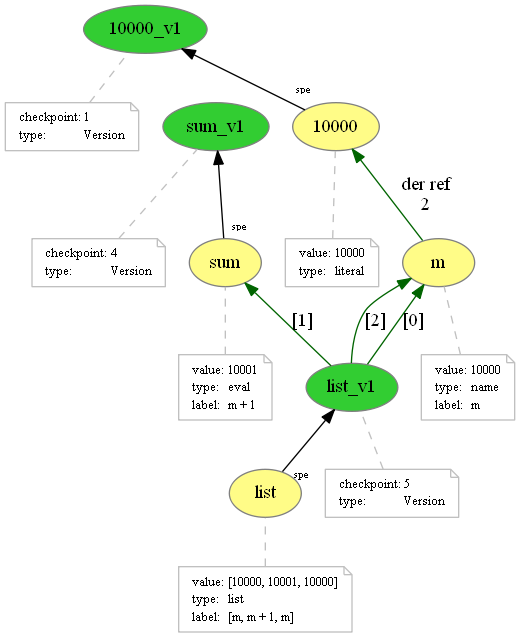

In [5]:
%%provn -o $BASE/list -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

// old
entity(10000, [value="10000", type="script:literal"])
entity(10000_v1, [intertwined:checkpoint="1", type="intertwined:Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="script:name", label="m"])
wasDerivedFrom(m, 10000, -, -, -, [type="intertwined:Reference", intertwined:checkpoint="2"])

entity(sum, [value="10001", type="script:eval", label="m + 1"])
entity(sum_v1, [intertwined:checkpoint="4", type="intertwined:Version"])
specializationOf(sum, sum_v1)

// new
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
entity(list_v1, [intertwined:checkpoint="5", type="intertwined:Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

## Assignment of list definition

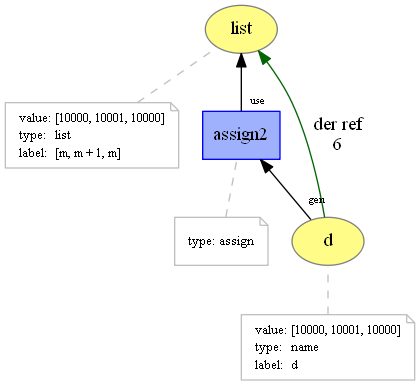

In [6]:
%%provn -o $BASE/list_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

// old
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])

// new
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4, [type="intertwined:Reference", intertwined:checkpoint="6"])

### Assignment 2

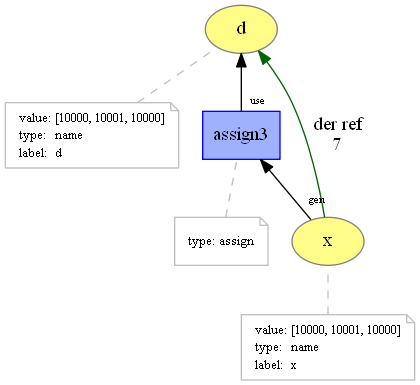

In [7]:
%%provn -o $BASE/list_assign2 -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

// old
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

// new
entity(x, [value="[10000, 10001, 10000]", type="script:name", label="x"])

activity(assign3, [type="assign"])
wasDerivedFrom(x, d, assign3, g4, u5, [type="intertwined:Reference", intertwined:checkpoint="7"])

## Function call

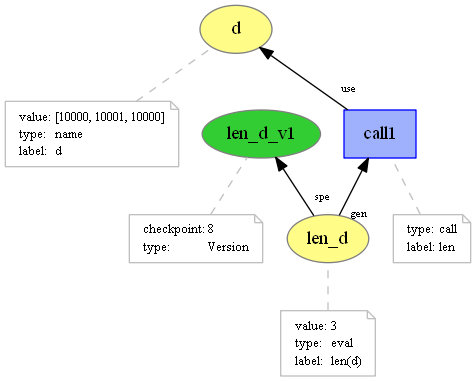

In [8]:
%%provn -o $BASE/call -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

// old
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

// new
entity(len_d, [value="3", type="script:eval", label="len(d)"])
entity(len_d_v1, [intertwined:checkpoint="8", type="intertwined:Version"])
specializationOf(len_d, len_d_v1)

activity(call1, [type="intertwined:call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

## Access to part of structure

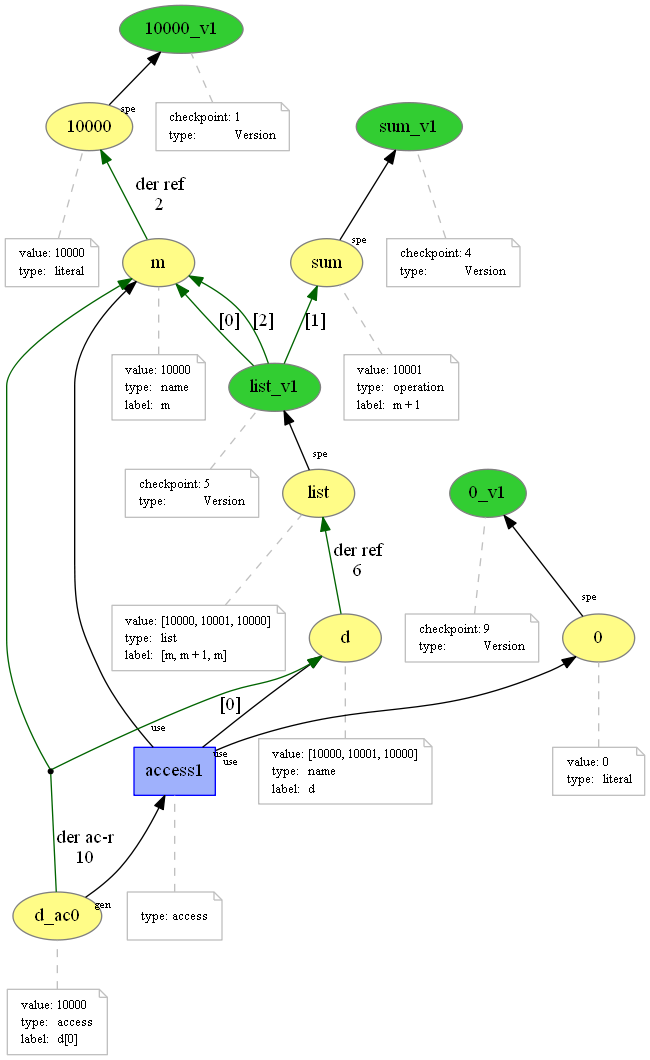

In [9]:
%%provn -o $BASE/access -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>
    
// old
entity(10000, [value="10000", type="script:literal"])
entity(10000_v1, [intertwined:checkpoint="1", type="intertwined:Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="script:name", label="m"])
wasDerivedFrom(m, 10000, -, -, -, [
    type="intertwined:Reference", intertwined:checkpoint="2"])

entity(sum, [value="10001", type="script:operation", label="m + 1"])
entity(sum_v1, [intertwined:checkpoint="4", type="intertwined:Version"])
specializationOf(sum, sum_v1)

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
entity(list_v1, [intertwined:checkpoint="5", type="intertwined:Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])
wasDerivedFrom(d, list, -, -, -, [
    type="intertwined:Reference", intertwined:checkpoint="6"])


// new
entity(0, [value="0", type="script:literal"])
entity(0_v1, [intertwined:checkpoint="9", type="intertwined:Version"])
specializationOf(0, 0_v1)

entity(d_ac0, [value="10000", type="script:access", label="d[0]"])

activity(access1, [type="access"])
used(access1, d, -)
used(access1, 0, -)
wasDerivedFrom(d_ac0, m, access1, g5, u6, [
    type="intertwined:Reference", intertwined:checkpoint="10",
    intertwined:whole="d", intertwined:key="0", intertwined:access="r"])

## Assignment to part of structure

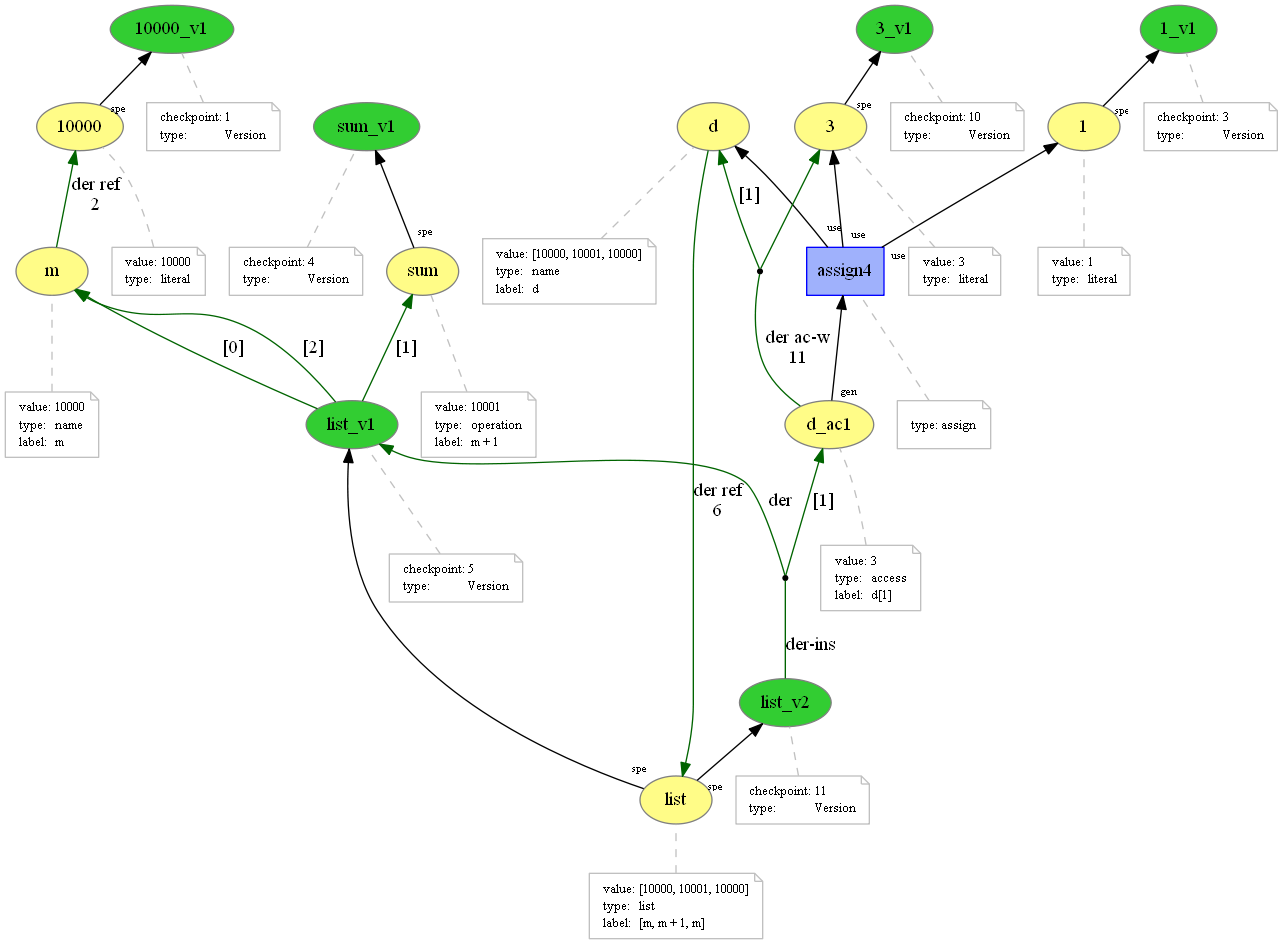

In [10]:
%%provn -o $BASE/part_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>
    
// old
entity(10000, [value="10000", type="script:literal"])
entity(10000_v1, [intertwined:checkpoint="1", type="intertwined:Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="script:name", label="m"])
wasDerivedFrom(m, 10000, -, -, -, [type="intertwined:Reference", intertwined:checkpoint="2"])

entity(sum, [value="10001", type="script:operation", label="m + 1"])
entity(sum_v1, [intertwined:checkpoint="4", type="intertwined:Version"])
specializationOf(sum, sum_v1)

entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list_v1, [intertwined:checkpoint="5", type="intertwined:Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])
wasDerivedFrom(d, list, -, -, -, [type="intertwined:Reference", intertwined:checkpoint="6"])

entity(1, [value="1", type="script:literal"])
entity(1_v1, [intertwined:checkpoint="3", type="intertwined:Version"])
specializationOf(1, 1_v1)


// new
entity(3, [value="3", type="script:literal"])
entity(3_v1, [intertwined:checkpoint="10", type="intertwined:Version"])
specializationOf(3, 3_v1)

entity(d_ac1, [value="3", type="script:access", label="d[1]"])

entity(list_v2, [intertwined:checkpoint="11", type="intertwined:Version"])
derivedByInsertionFrom(list_v2, list_v1, {("1", d_ac1)})
specializationOf(list, list_v2)

activity(assign4, [type="script:assign"])
used(assign4, d, -)
used(assign4, 1, -)
wasDerivedFrom(d_ac1, 3, assign4, g6, u7, [
    type="intertwined:Reference", intertwined:checkpoint="11", intertwined:whole="d",
    intertwined:key="1", intertwined:access="w"])

## Full

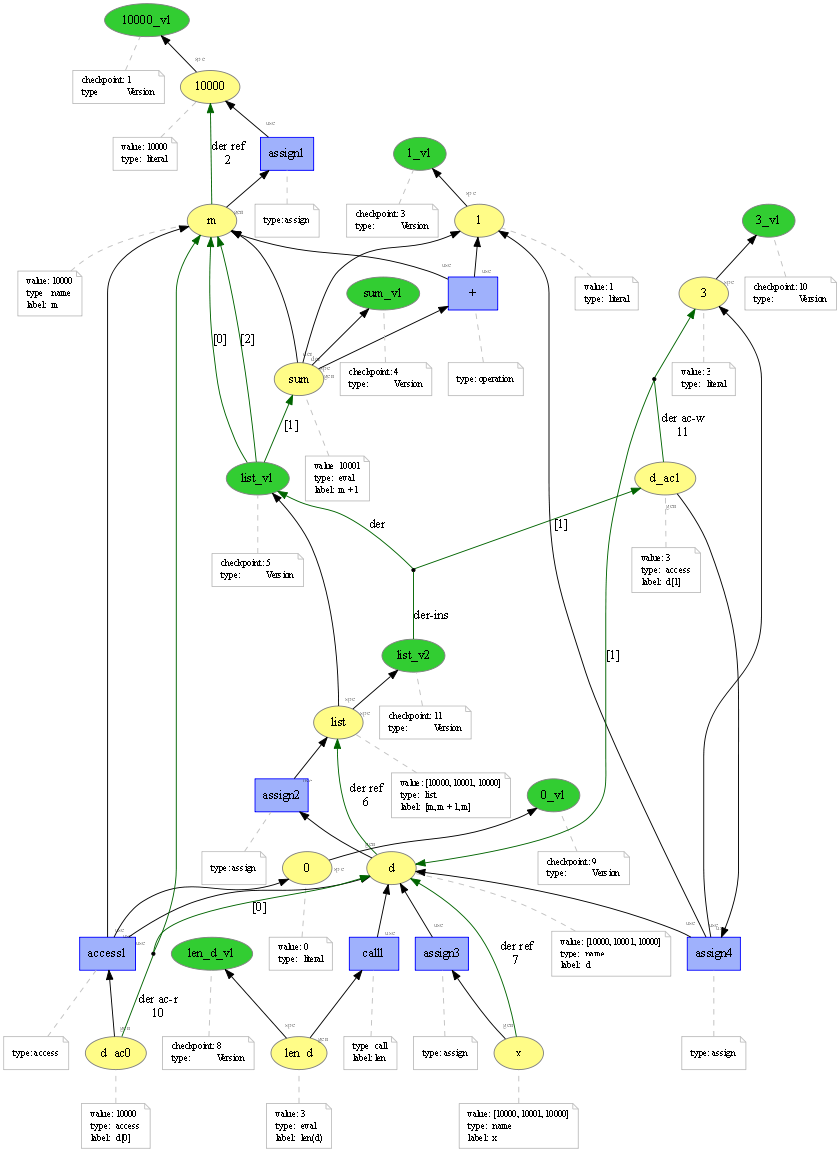

In [11]:
%%provn -o $BASE/full -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix intertwined <https://dew-uff.github.io/versioned-prov/ns/intertwined#>

// assignment
entity(10000, [value="10000", type="script:literal"])
entity(10000_v1, [intertwined:checkpoint="1", type="intertwined:Version"])
specializationOf(10000, 10000_v1)

entity(m, [value="10000", type="script:name", label="m"])

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="intertwined:Reference", intertwined:checkpoint="2"])

// operation
entity(1, [value="1", type="script:literal"])
entity(1_v1, [intertwined:checkpoint="3", type="intertwined:Version"])
specializationOf(1, 1_v1)

entity(sum, [value="10001", type="script:eval", label="m + 1"])
entity(sum_v1, [intertwined:checkpoint="4", type="intertwined:Version"])
specializationOf(sum, sum_v1)

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g2, u3)

// list def
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
entity(list_v1, [intertwined:checkpoint="5", type="intertwined:Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

// list assign
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4, [type="intertwined:Reference", intertwined:checkpoint="6"])

// list assign x
entity(x, [value="[10000, 10001, 10000]", type="script:name", label="x"])

activity(assign3, [type="assign"])
wasDerivedFrom(x, d, assign3, g4, u5, [type="intertwined:Reference", intertwined:checkpoint="7"])

// call
entity(len_d, [value="3", type="script:eval", label="len(d)"])
entity(len_d_v1, [intertwined:checkpoint="8", type="intertwined:Version"])
specializationOf(len_d, len_d_v1)

activity(call1, [type="intertwined:call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

// part access
entity(0, [value="0", type="script:literal"])
entity(0_v1, [intertwined:checkpoint="9", type="intertwined:Version"])
specializationOf(0, 0_v1)

entity(d_ac0, [value="10000", type="script:access", label="d[0]"])

activity(access1, [type="access"])
used(access1, d, -)
used(access1, 0, -)
wasDerivedFrom(d_ac0, m, access1, g5, u6, [
    type="intertwined:Reference", intertwined:checkpoint="10",
    intertwined:whole="d", intertwined:key="0", intertwined:access="r"])

// part assign
entity(3, [value="3", type="script:literal"])
entity(3_v1, [intertwined:checkpoint="10", type="intertwined:Version"])
specializationOf(3, 3_v1)

entity(d_ac1, [value="3", type="script:access", label="d[1]"])

entity(list_v2, [intertwined:checkpoint="11", type="intertwined:Version"])
derivedByInsertionFrom(list_v2, list_v1, {("1", d_ac1)})
specializationOf(list, list_v2)

activity(assign4, [type="script:assign"])
used(assign4, d, -)
used(assign4, 1, -)
wasDerivedFrom(d_ac1, 3, assign4, g6, u7, [
    type="intertwined:Reference", intertwined:checkpoint="11", intertwined:whole="d",
    intertwined:key="1", intertwined:access="w"])